In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

#mouse_drug_data_pd.head()
#clinical_trial_data_pd.head()
#Mouse ID will be the join key

# Combine the data into a single dataset
# Why does this not work....I get a lot of NaN
#clinical_results_df = pd.concat([mouse_drug_data_pd, clinical_trial_data_pd])

clinical_results_df = mouse_drug_data_df.merge(clinical_trial_data_df, how='left', on = 'Mouse ID')
# Display the data table for preview
clinical_results_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#clinical_results_df.groupby(['Drug','Timepoint'])
#tumor_volume_mean = clinical_results_df['Tumor Volume (mm3)'].mean()
#drug = clinical_results_df['Drug']
#timepoint = clinical_results_df['Timepoint']

# Convert to DataFrame
#tumor_response_df = pd.DataFrame({'Drug': drug,
                                # 'Timepoint': timepoint,
                                # 'Tumor Volume (mm3)': tumor_volume_mean})
# I am not sure why this caused problems latter down
#---------------------------------------------------------------        

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = clinical_results_df.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
tumor_response_df = tumor_response_df.drop(columns='Metastatic Sites')

tumor_response_df = tumor_response_df.reset_index()
# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_tvol = clinical_results_df['Tumor Volume (mm3)'].sem()
drug = clinical_results_df['Drug']
timepoint = clinical_results_df['Timepoint']

# Convert to DataFrame
tumor_stderr_df = pd.DataFrame({'Drug': drug,
                                 'Timepoint': timepoint,
                                'Tumor Volume (mm3)': std_err_tvol})

#tumor_stderr_df = tumor_stderr_df.reset_index()
# Preview DataFrame
tumor_stderr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,0.203161
1,Stelasyn,5,0.203161
2,Stelasyn,10,0.203161
3,Stelasyn,15,0.203161
4,Stelasyn,20,0.203161


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

#drug_sort_table = tumor_response_df.pivot_table(index=['Timepoint'], columns='Drug')

#drug_sort_table = drug_sort_table.reset_index()
#dfObj = dfObj.sort_values(by ='b', axis=1)
# Preview that Reformatting worked

#drug_sort_table.head()

# I do not understand why the code above is NOT working
#--------------------------------------------------------------

drug_sort_table = tumor_response_df.pivot(index='Timepoint', columns='Drug')
drug_sort_table = drug_sort_table.reset_index()
# Preview that Reformatting worked
drug_sort_table.head()

Timepoint Tumor Volume (mm3)                                              \
Drug                    Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
0            0          45.000000  45.000000  45.000000  45.000000  45.000000   
1            5          44.266086  46.503051  47.062001  47.389175  46.796098   
2           10          43.084291  48.285125  49.403909  49.582269  48.694210   
3           15          42.064317  50.094055  51.296397  52.399974  50.933018   
4           20          40.716325  52.157049  53.197691  54.920935  53.644087   

                                                             
Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#Set the size for all of the subsequent graphs in this Jupyter Lab Book

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


print(plt.rcParams.get('figure.figsize'))

[10.0, 8.0]


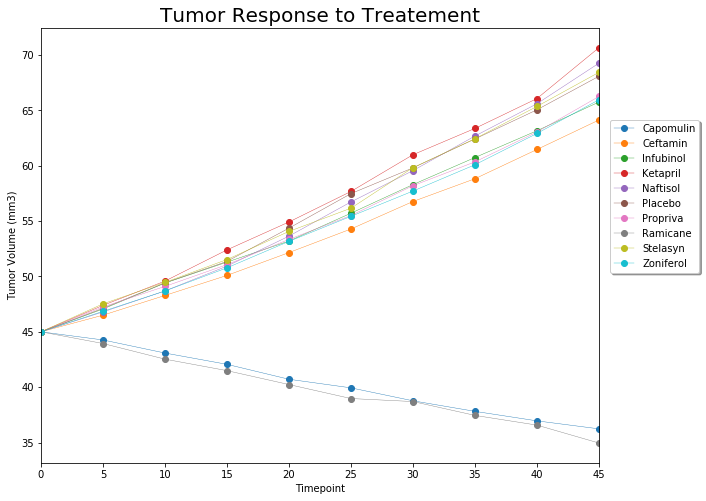

In [14]:
# Generate the Plot (with Error Bars)
drug_sort_table.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', linewidth=.4, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.title('Tumor Response to Treatement', fontsize = 20)
plt.ylabel('Tumor Volume (mm3)')
# Save the Figure
plt.savefig("treatment_response_image.png" , bbox_inches = "tight")
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_df = clinical_results_df.groupby(['Drug','Timepoint']).mean()

metastatic_response_df = metastatic_response_df.drop(columns='Tumor Volume (mm3)')
metastatic_response_df = metastatic_response_df.reset_index()

# Convert to DataFrame

# Preview DataFrame
metastatic_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_stderr_df = clinical_results_df.groupby(['Drug','Timepoint']).sem()


# Convert to DataFrame
metastatic_stderr_df = metastatic_stderr_df.drop(columns='Tumor Volume (mm3)')
metastatic_stderr_df = metastatic_stderr_df.drop(columns='Mouse ID')
metastatic_stderr_df = metastatic_stderr_df.reset_index()

# Preview DataFrame
metastatic_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_table = metastatic_response_df.pivot(index='Timepoint', columns='Drug')

metastatic_response_table = metastatic_response_table.reset_index()

# Preview that Reformatting worked
metastatic_response_table.head()

Timepoint Metastatic Sites                                          \
Drug                  Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
0            0         0.000000  0.000000  0.000000  0.000000  0.000000   
1            5         0.160000  0.380952  0.280000  0.304348  0.260870   
2           10         0.320000  0.600000  0.666667  0.590909  0.523810   
3           15         0.375000  0.789474  0.904762  0.842105  0.857143   
4           20         0.652174  1.111111  1.050000  1.210526  1.150000   

                                                        
Drug   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.375000  0.320000  0.120000  0.240000  0.166667  
2     0.833333  0.565217  0.250000  0.478261  0.500000  
3     1.250000  0.764706  0.333333  0.782609  0.809524  
4     1.526316  1.000000  0.347826  0.952381  1.294118

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


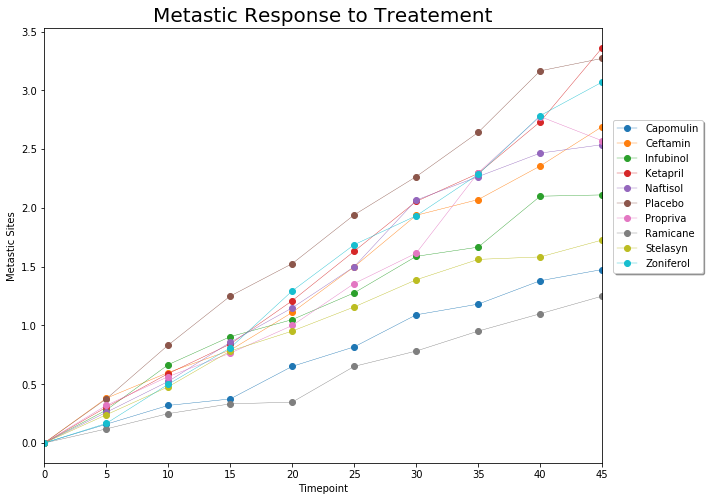

In [15]:

# Generate the Plot (with Error Bars)
metastatic_response_table.plot(kind='line', x='Timepoint', y='Metastatic Sites', linewidth=.4, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.title('Metastic Response to Treatement', fontsize = 20)
plt.ylabel('Metastic Sites')
# Save the Figure
plt.savefig("metastic_response_image.png" , bbox_inches = "tight")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates_df = clinical_results_df.groupby(['Drug','Timepoint']).count()

# Convert to DataFrame
survival_rates_df = survival_rates_df.drop(columns = ['Tumor Volume (mm3)', 'Metastatic Sites'])
survival_rates_df = survival_rates_df.rename(columns = {'Mouse ID': 'Mouse Count'})

survival_rates_df = survival_rates_df.reset_index()
# Preview DataFrame
survival_rates_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_table = survival_rates_df.pivot(index='Timepoint', columns='Drug')
# Preview the Data Frame

survival_rates_table = survival_rates_table.reset_index()
# Preview that Reformatting worked
survival_rates_table.head()

Timepoint Mouse Count                                               \
Drug             Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
0            0          25       25        25       25       25      25   
1            5          25       21        25       23       23      24   
2           10          25       20        21       22       21      24   
3           15          24       19        21       19       21      20   
4           20          23       18        20       19       20      19   

                                           
Drug Propriva Ramicane Stelasyn Zoniferol  
0          26       25       26        25  
1          25       25       25        24  
2          23       24       23        22  
3          17       24       23        21  
4          17       23       21        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


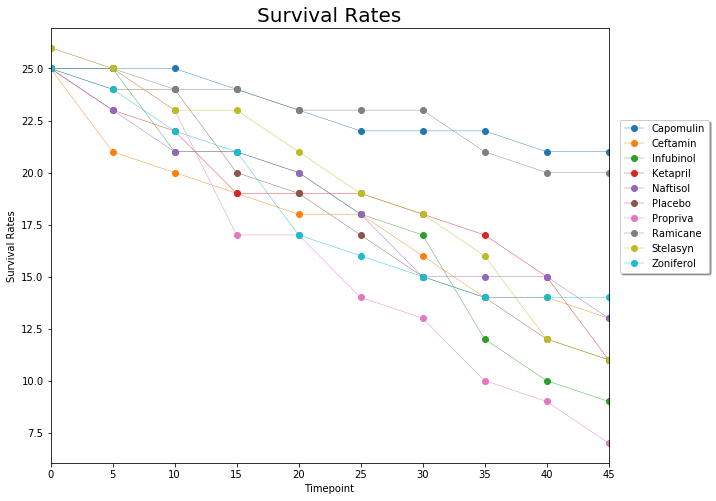

In [16]:
# Generate the Plot (Accounting for percentages)
survival_rates_table.plot(kind='line', x='Timepoint', y='Mouse Count', linewidth=.4, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.title('Survival Rates', fontsize = 20)
plt.ylabel('Survival Rates')
# Save the Figure
plt.savefig("survival_rates_image.png" , bbox_inches = "tight")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)